# Crypto API

In [82]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '02c1b3c1-7360-492f-86b2-dce013583e0d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
 print(e)

In [83]:
type(data)

dict

In [84]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Transform into Dataframe

In [85]:
df = pd.json_normalize(data['data'])

In [86]:
df['timestamp'] = pd.to_datetime('now')

In [87]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10553,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.954492e+07,1.954492e+07,False,NaN,1,NaN,NaN,None,2023-11-17T17:57:00.000Z,36506.764048,2.601293e+10,-13.5422,1.422157,0.396068,-1.883330,28.755636,36.255512,39.889930,7.135217e+11,51.6292,7.666420e+11,None,2023-11-17T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 01:57:29.234982
1,1027,Ethereum,ETH,ethereum,7794,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202534e+08,1.202534e+08,True,NaN,2,NaN,NaN,None,2023-11-17T17:57:00.000Z,1942.754369,1.374110e+10,-8.5272,1.397035,-2.852135,-7.311442,23.819473,18.494978,15.613673,2.336228e+11,16.8779,2.336228e+11,None,2023-11-17T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 01:57:29.234982
2,825,Tether USDt,USDT,tether,65945,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.752990e+10,9.062328e+10,True,NaN,3,NaN,NaN,None,2023-11-17T17:56:00.000Z,1.000160,5.172964e+10,-6.9331,-0.001814,0.000881,-0.016131,-0.018188,-0.016295,0.034493,8.754387e+10,6.3338,9.063775e+10,None,2023-11-17T17:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-18 01:57:29.234982
3,1839,BNB,BNB,bnb,1766,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517009e+08,1.517009e+08,False,NaN,4,NaN,NaN,None,2023-11-17T17:56:00.000Z,244.095408,8.775343e+08,-6.7086,1.395739,-1.076544,-2.795813,15.403596,12.703904,12.052146,3.702948e+10,2.6787,3.702948e+10,None,2023-11-17T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 01:57:29.234982
4,52,XRP,XRP,xrp,1144,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.371831e+10,9.998822e+10,False,NaN,5,NaN,NaN,None,2023-11-17T17:57:00.000Z,0.606275,1.684518e+09,-3.2771,1.976036,-2.992341,-7.803523,23.482042,21.047698,16.645092,3.256807e+10,2.3529,6.062750e+10,None,2023-11-17T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 01:57:29.234982
5,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.227490e+08,5.626374e+08,True,NaN,6,NaN,NaN,None,2023-11-17T17:57:00.000Z,57.339921,3.785790e+09,-5.8721,3.766646,-7.497170,9.665204,142.826308,190.916078,161.655077,2.424040e+10,1.7512,3.226158e+10,None,2023-11-17T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 01:57:29.234982
6,3408,USDC,USDC,usd-coin,14991,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.417873e+10,2.417873e+10,False,NaN,7,NaN,NaN,None,2023-11-17T17:57:00.000Z,1.000228,6.535944e+09,-6.1632,0.000623,0.024000,0.005255,0.021246,0.006089,0.008010,2.418424e+10,1.7472,2.418424e+10,None,2023-11-17T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-18 01:57:29.234982
7,2010,Cardano,ADA,cardano,975,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.527851e+10,3.636539e+10,False,NaN,8,NaN,NaN,None,2023-11-17T17:56:00.000Z,0.366400,5.403246e+08,-24.7444,2.034283,-4.309807,-1.929136,49.039818,45.249427,36.759252,1.292606e+10,0.9352,1.648801e+10,None,2023-11-17T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 01:57:29.234982
8,74,Dogecoin,DOGE,dogecoin,825,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.

# Function

In [97]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '02c1b3c1-7360-492f-86b2-dce013583e0d',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Within Notebook
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df,df_append])
    
    # To csv
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\User\Documents\DATA ANALYST\ALEX THE ANALYST\PROJECTS\Python\API.csv'):
        df.to_csv(r'C:\Users\User\Documents\DATA ANALYST\ALEX THE ANALYST\PROJECTS\Python\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\User\Documents\DATA ANALYST\ALEX THE ANALYST\PROJECTS\Python\API.csv', mode = 'a', header = False)

# Automation

In [102]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(5) # Delay 1 minute
exit()

API Runner Completed


KeyboardInterrupt: 

# Read in CSV File

In [104]:
dfapi = pd.read_csv(r'C:\Users\User\Documents\DATA ANALYST\ALEX THE ANALYST\PROJECTS\Python\API.csv')

dfapi

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10553,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.954492e+07,1.954492e+07,False,NaN,1,NaN,NaN,NaN,2023-11-17T18:04:00.000Z,36544.411374,2.587602e+10,-13.3881,0.028896,0.595536,-1.990797,28.955821,36.335253,40.330013,7.142575e+11,51.6116,7.674326e+11,NaN,2023-11-17T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 02:04:40.218520
1,1,1027,Ethereum,ETH,ethereum,7794,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202534e+08,1.202534e+08,True,NaN,2,NaN,NaN,NaN,2023-11-17T18:04:00.000Z,1944.717676,1.366672e+10,-8.7599,0.822682,-2.627017,-7.447464,23.858703,18.503355,15.962312,2.338589e+11,16.9026,2.338589e+11,NaN,2023-11-17T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 02:04:40.218520
2,2,825,Tether USDt,USDT,tether,65945,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.752990e+10,9.062328e+10,True,NaN,3,NaN,NaN,NaN,2023-11-17T18:03:00.000Z,1.000258,5.161860e+10,-6.9456,0.039278,-0.001893,-0.006050,-0.012449,-0.029690,0.018537,8.755245e+10,6.3290,9.064663e+10,NaN,2023-11-17T18:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-18 02:04:40.218520
3,3,1839,BNB,BNB,bnb,1766,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.517009e+08,1.517009e+08,False,NaN,4,NaN,NaN,NaN,2023-11-17T18:03:00.000Z,244.165277,8.757793e+08,-6.5903,1.505641,-0.842435,-2.840418,15.411489,12.866213,12.163445,3.704008e+10,2.6771,3.704008e+10,NaN,2023-11-17T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 02:04:40.218520
4,4,52,XRP,XRP,xrp,1144,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.371831e+10,9.998822e+10,False,NaN,5,NaN,NaN,NaN,2023-11-17T18:04:00.000Z,0.606851,1.681046e+09,-2.2524,1.350795,-2.691833,-7.923706,23.457700,21.274005,17.007873,3.259903e+10,2.3562,6.068515e+10,NaN,2023-11-17T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 02:04:40.218520
5,5,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.227490e+08,5.626374e+08,True,NaN,6,NaN,NaN,NaN,2023-11-17T18:04:00.000Z,57.491220,3.779386e+09,-5.6351,2.876732,-7.172974,7.958677,143.379110,191.848009,162.775252,2.430436e+10,1.7566,3.234671e+10,NaN,2023-11-17T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 02:04:40.218520
6,6,3408,USDC,USDC,usd-coin,14991,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.417873e+10,2.417873e+10,False,NaN,7,NaN,NaN,NaN,2023-11-17T18:04:00.000Z,1.000084,6.505922e+09,-6.8868,0.000202,0.009379,-0.005261,-0.014082,0.002488,-0.013339,2.418077e+10,1.7477,2.418077e+10,NaN,2023-11-17T18:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-18 02:04:40.218520
7,7,2010,Cardano,ADA,cardano,975,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.527851e+10,3.636539e+10,False,NaN,8,NaN,NaN,NaN,2023-11-17T18:03:00.000Z,0.366692,5.390484e+08,-24.5914,2.204056,-3.873318,-1.929757,49.129050,45.558207,36.937472,1.293633e+10,0.9351,1.650112e+10,NaN,2023-11-17T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-18 02:04:40.218520
8,8,74,Dogecoin,DOGE,dogecoin,825,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-

# Grouping

In [110]:
dfcom = dfapi.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

dfcom

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.107109,0.493969,-2.040135,28.827599,36.235554,40.197780
Ethereum,0.806200,-2.642668,-7.495373,23.781068,18.454342,15.900132
Tether USDt,0.023087,0.001920,-0.009505,-0.015272,-0.026391,0.021072
BNB,1.112164,-0.903555,-2.905480,15.350769,12.787370,12.119398
XRP,1.228614,-2.794194,-7.994851,23.410112,21.165773,16.914064
Solana,2.430542,-7.219864,7.456000,143.392989,191.862254,162.953423
USDC,0.005548,0.011860,0.001447,-0.006443,0.004380,-0.005547
Cardano,1.452964,-4.024770,-2.138105,48.904250,45.325908,36.773393
Dogecoin,1.568397,5.176532,12.105441,42.179112,34.799057,30.373221


# Setting Index

In [112]:
df3 = dfcom.stack()

df3

name                                     
Bitcoin      quote.USD.percent_change_1h       0.107109
             quote.USD.percent_change_24h      0.493969
             quote.USD.percent_change_7d      -2.040135
             quote.USD.percent_change_30d     28.827599
             quote.USD.percent_change_60d     36.235554
             quote.USD.percent_change_90d     40.197780
Ethereum     quote.USD.percent_change_1h       0.806200
             quote.USD.percent_change_24h     -2.642668
             quote.USD.percent_change_7d      -7.495373
             quote.USD.percent_change_30d     23.781068
             quote.USD.percent_change_60d     18.454342
             quote.USD.percent_change_90d     15.900132
Tether USDt  quote.USD.percent_change_1h       0.023087
             quote.USD.percent_change_24h      0.001920
             quote.USD.percent_change_7d      -0.009505
             quote.USD.percent_change_30d     -0.015272
             quote.USD.percent_change_60d     -0.026391
      

In [114]:
df4 = df3.to_frame(name='values')

df4

values
name                                                
Bitcoin     quote.USD.percent_change_1h     0.107109
            quote.USD.percent_change_24h    0.493969
            quote.USD.percent_change_7d    -2.040135
            quote.USD.percent_change_30d   28.827599
            quote.USD.percent_change_60d   36.235554
            quote.USD.percent_change_90d   40.197780
Ethereum    quote.USD.percent_change_1h     0.806200
            quote.USD.percent_change_24h   -2.642668
            quote.USD.percent_change_7d    -7.495373
            quote.USD.percent_change_30d   23.781068
            quote.USD.percent_change_60d   18.454342
            quote.USD.percent_change_90d   15.900132
Tether USDt quote.USD.percent_change_1h     0.023087
            quote.USD.percent_change_24h    0.001920
            quote.USD.percent_change_7d    -0.009505
            quote.USD.percent_change_30d   -0.015272
            quote.USD.percent_change_60d   -0.026391
            quote.USD.percent_change_90d    0.021072
BNB         quote.USD.percent_change_1h     1.112164
            quote.USD.percent_change_24h   -0.903555
            quote.USD.percent_change_7d    -2.905480
            quote.USD.percent_change_30d   15.350769
            quote.USD.percent_change_60d   12.787370
            quote.USD.percent_change_90d   12.119398
XRP         quote.USD.percent_change_1h     1.228614
            quote.USD.percent_change_24h   -2.794194
            quote.USD.percent_change_7d    -7.994851
            quote.USD.percent_change_30d   23.410112
            quote.USD.percent_change_60d   21.165773
            quote.USD.percent_change_90d   16.914064
Solana      quote.USD.percent_change_1h     2.430542
            quote.USD.percent_change_24h   -7.219864
            quote.USD.percent_change_7d     7.456000
            quote.USD.percent_change_30d  143.392989
            quote.USD.percent_change_60d  191.862254
            quote.USD.percent_change_90d  162.953423
USDC        quote.USD.percent_change_1h     0.005548
            quote.USD.percent_change_24h    0.011860
            quote.USD.percent_change_7d     0.001447
            quote.USD.percent_change_30d   -0.006443
            quote.USD.percent_change_60d    0.004380
            quote.USD.percent_change_90d   -0.005547
Cardano     quote.USD.percent_change_1h     1.452964
            quote.USD.percent_change_24h   -4.024770
            quote.USD.percent_change_7d    -2.138105
            quote.USD.percent_change_30d   48.904250
            quote.USD.percent_change_60d   45.325908
            quote.USD.percent_change_90d   36.773393
Dogecoin    quote.USD.percent_change_1h     1.568397
            quote.USD.percent_change_24h    5.176532
            quote.USD.percent_change_7d    12.105441
            quote.USD.percent_change_30d   42.179112
            quote.USD.percent_change_60d   34.799057
            quote.USD.percent_change_90d   30.373221
TRON        quote.USD.percent_change_1h     0.612103
            quote.USD.percent_change_24h   -0.238972
            quote.USD.percent_change_7d    -2.518743
            quote.USD.percent_change_30d   15.307889
            quote.USD.percent_change_60d   22.494597
            quote.USD.percent_change_90d   39.279365
Toncoin     quote.USD.percent_change_1h     1.526877
            quote.USD.percent_change_24h   -2.154718
            quote.USD.percent_change_7d    -6.597673
            quote.USD.percent_change_30d   11.859343
            quote.USD.percent_change_60d   -4.723557
            quote.USD.percent_change_90d   70.883192
Polygon     quote.USD.percent_change_1h     2.274189
            quote.USD.percent_change_24h   -5.868723
            quote.USD.percent_change_7d    -1.121210
            quote.USD.percent_change_30d   60.712865
            quote.USD.percent_change_60d   57.294407
            quote.USD.percent_change_90d   41.879614
Avalanche   quote.USD.percent_change_1h     2.329880
            quote.USD.percent_change_24h   -5.997385
            quote.

In [119]:
index = pd.Index(range(90))

df5 = df4.set_index(index)

df5

,values
0,0.107109
1,0.493969
2,-2.040135
3,28.827599
4,36.235554
5,40.197780
6,0.806200
7,-2.642668
8,-7.495373
9,23.781068


In [120]:
df5 = df4.reset_index()

df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.107109
1,Bitcoin,quote.USD.percent_change_24h,0.493969
2,Bitcoin,quote.USD.percent_change_7d,-2.040135
3,Bitcoin,quote.USD.percent_change_30d,28.827599
4,Bitcoin,quote.USD.percent_change_60d,36.235554
5,Bitcoin,quote.USD.percent_change_90d,40.197780
6,Ethereum,quote.USD.percent_change_1h,0.806200
7,Ethereum,quote.USD.percent_change_24h,-2.642668
8,Ethereum,quote.USD.percent_change_7d,-7.495373
9,Ethereum,quote.USD.percent_change_30d,23.781068


In [127]:
df6 = df5.rename(columns={'level_1':'percent_change'})

df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.107109
1,Bitcoin,quote.USD.percent_change_24h,0.493969
2,Bitcoin,quote.USD.percent_change_7d,-2.040135
3,Bitcoin,quote.USD.percent_change_30d,28.827599
4,Bitcoin,quote.USD.percent_change_60d,36.235554
5,Bitcoin,quote.USD.percent_change_90d,40.197780
6,Ethereum,quote.USD.percent_change_1h,0.806200
7,Ethereum,quote.USD.percent_change_24h,-2.642668
8,Ethereum,quote.USD.percent_change_7d,-7.495373
9,Ethereum,quote.USD.percent_change_30d,23.781068


In [129]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

df6

,name,percent_change,values
0,Bitcoin,1h,0.107109
1,Bitcoin,24h,0.493969
2,Bitcoin,7d,-2.040135
3,Bitcoin,30d,28.827599
4,Bitcoin,60d,36.235554
5,Bitcoin,90d,40.197780
6,Ethereum,1h,0.806200
7,Ethereum,24h,-2.642668
8,Ethereum,7d,-7.495373
9,Ethereum,30d,23.781068


# Visualization

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


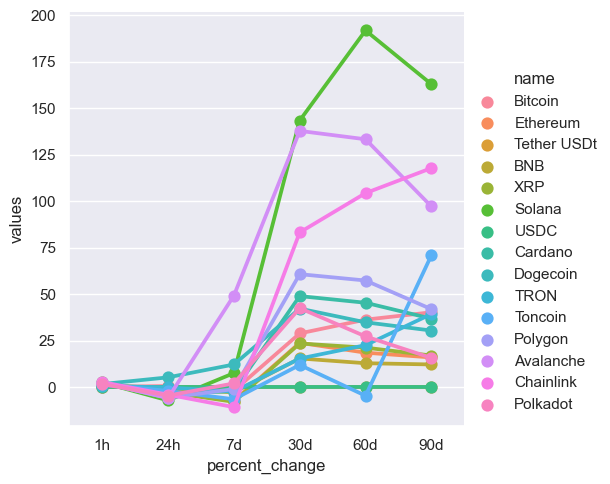

In [135]:
sns.set(rc={'figure.figsize':(21.7,8.27)})

sns.catplot(x = 'percent_change', y='values', hue='name', data=df6, kind='point')

In [140]:
df7 = dfapi[['name','quote.USD.price','timestamp']]

df7 = df7.query("name == 'Bitcoin'")

df7

,name,quote.USD.price,timestamp
0,Bitcoin,36544.411374,2023-11-18 02:04:40.218520
15,Bitcoin,36544.411374,2023-11-18 02:04:45.864879
30,Bitcoin,36473.631606,2023-11-18 02:14:02.766864


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

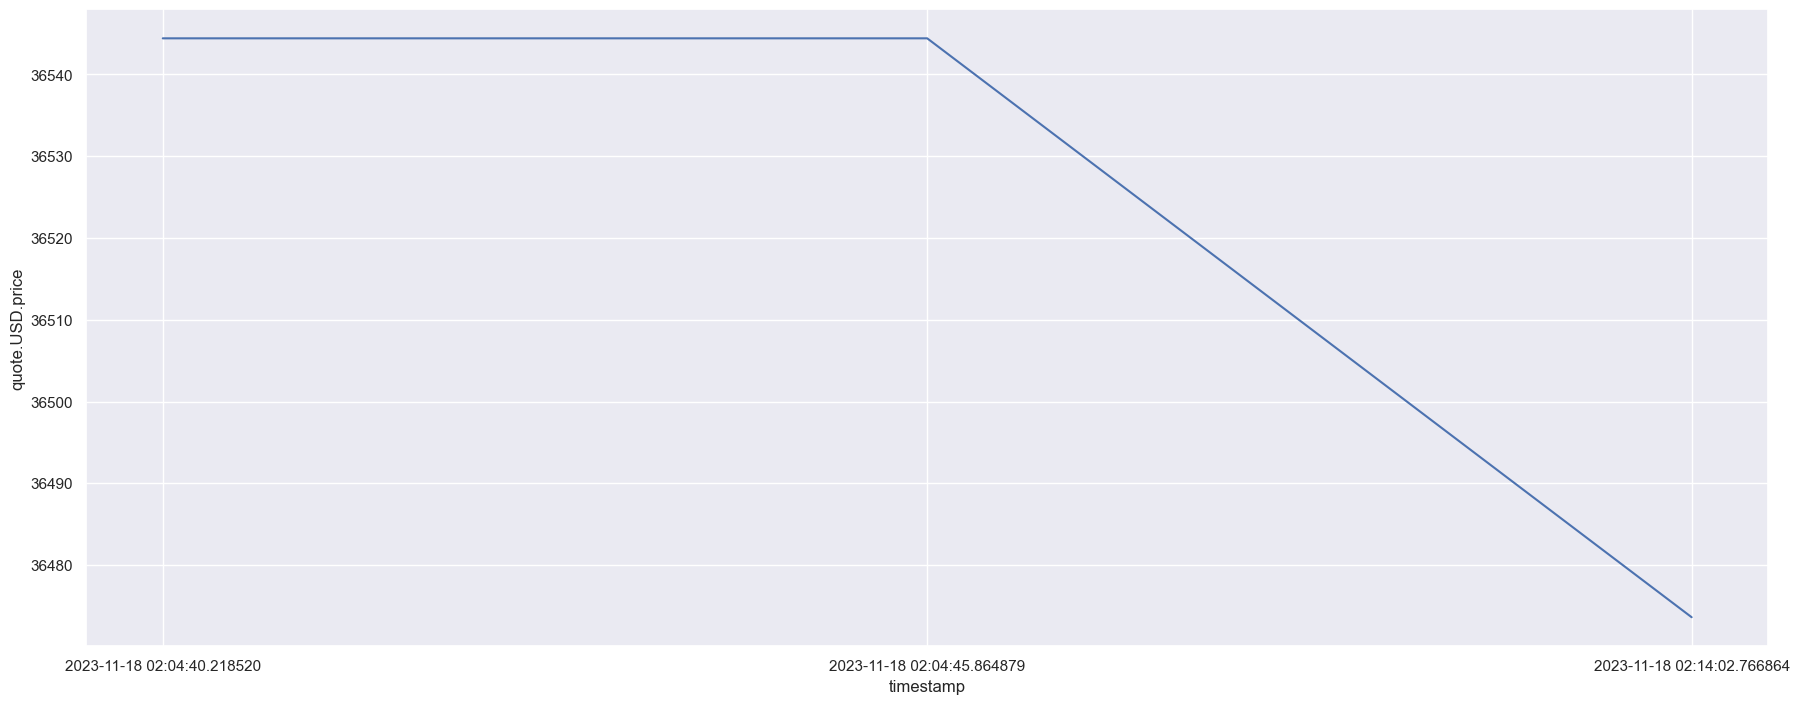

In [141]:
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df7)